<a href="https://colab.research.google.com/github/CHIN-HUA/hellocolab/blob/main/%E5%A4%9A%E5%AA%92%E9%AB%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample rate: <wave.Wave_read object at 0x7f484bcc5f90> Hz
Sample rate: <wave.Wave_read object at 0x7f484bab4e10> Hz
channels:  1
sample_width:  1
framerate:  44100
numframes:  1362220
readframes:  b'\x7f'
channels2:  1
sample_width2:  1
framerate2:  44100
numframes2:  1362220
readframes2:  b'\x7f'


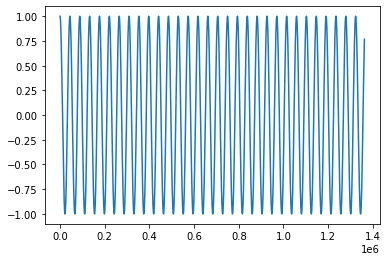

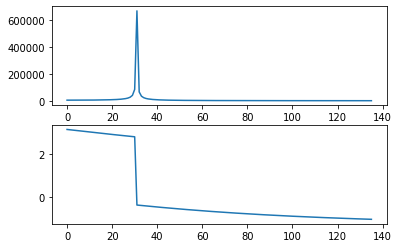

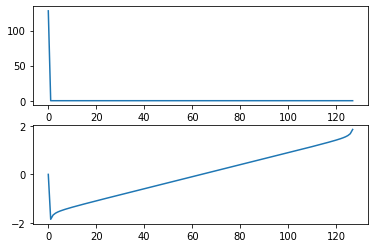

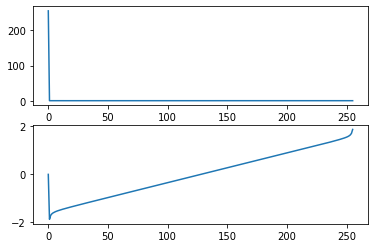

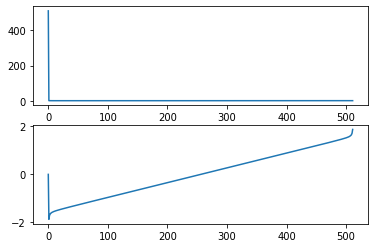

In [ ]:
from scipy.io.wavfile import read
from scipy import *
from pylab import *
import wave
import shutil
from pathlib import Path
import numpy as np
import scipy.signal as signal
import struct
import matplotlib.pyplot as plt

%matplotlib inline

# 讀取 WAV 檔案
filename = 'Hello.wav'
rate = wave.open(filename, 'rb') #read 
print("Sample rate: {} Hz".format(rate))

src=r'Hello.wav'
rateA = open(src, 'rb') #read 
des=r'b.wav'
rateB = open(des, 'wb') #write
shutil.copyfileobj(rateA, rateB)

filename2 = 'b.wav'
rate2 = wave.open(filename2, 'rb') #read 
print("Sample rate: {} Hz".format(rate2))

#Part2
nchannels = rate.getnchannels()
sample_width = rate.getsampwidth()
framerate = rate.getframerate()
numframes = rate.getnframes()
Readframes = rate.readframes(1)

print("channels: ", nchannels)
print("sample_width: ",sample_width )
print("framerate: ", framerate)
print("numframes: ", numframes)
print("readframes: ", Readframes)

nchannels2 = rate2.getnchannels()
sample_width2 = rate2.getsampwidth()
framerate2 = rate2.getframerate()
numframes2 = rate2.getnframes()
Readframes2 = rate2.readframes(1)

print("channels2: ", nchannels2)
print("sample_width2: ",sample_width2 )
print("framerate2: ", framerate2)
print("numframes2: ", numframes2)
print("readframes2: ", Readframes2)


def generate_sinusoid(N, A, f0, fs, phi):
    '''
    N(int) : number of samples
    A(float) : amplitude
    f0(float): frequency in Hz
    fs(float): sample rate
    phi(float): initial phase
    
    return 
    x (numpy array): sinusoid signal which lenght is M
    '''
    
    T = 1/fs
    n = np.arange(N)    # [0,1,..., N-1]
    x = A * np.cos( 2*f0*np.pi*n*T + phi )
    
    return x

N = numframes
A = nchannels
f0 = sample_width
fs = framerate
phi = 0
x = generate_sinusoid(N, A, f0, fs, phi)

plt.plot(x)
plt.show()

def generate_complex_sinusoid(k, N):
    '''
    k (int): frequency index
    N (int): length of complex sinusoid in samples
    
    returns
    c_sin (numpy array): the generated complex sinusoid (length N)
    '''
    
    n = np.arange(N)
    
    c_sin = np.exp(1j * 2 * np.pi * k * n / N)
    
    return np.conjugate(c_sin)

def generate_complex_sinusoid_matrix(N):
    '''
    N (int): length of complex sinusoid in samples
    
    returns
    c_sin_matrix (numpy array): the generated complex sinusoid (length N)
    '''
    
    n = np.arange(N)
    n = np.expand_dims(n, axis=1)      # 扩充维度，将1D向量，转为2D矩阵，方便后面的矩阵相乘
    
    k = n
    
    m = n.T * k / N                    # [N,1] * [1, N] = [N,N]
    
    S = np.exp(1j * 2 * np.pi * m)     # 计算矩阵 S
    
    return np.conjugate(S)

# 生成信号，用于测试
N = 1362220
A = 1
f0 = 1
fs = 44100
phi = 0
x = generate_sinusoid(N, A, f0, fs, phi)


# 第一种方式计算DFT
X_1 = np.array([])
for k in range(136):
    s = generate_complex_sinusoid(k, N)
    X_1 = np.append(X_1, np.sum(x * s))
    
mX = np.abs(X_1)
pX = np.angle(X_1)

# plot the magnitude and phase
plt.subplot(2,1,1)
plt.plot(mX)

plt.subplot(2,1,2)
plt.plot(pX)
plt.show()

#逆轉----------------------------------------------------------------------

# def generate_complex_sinusoid_Bor(k, N):
#     '''
#     k (int): frequency index
#     N (int): length of complex sinusoid in samples
    
#     returns
#     c_sin (numpy array): the generated complex sinusoid (length N)
#     '''
    
#     n = np.arange(N)
    
#     c_sin = np.exp(N / 1j * 2 * np.pi * k * n)
    
#     return np.conjugate(c_sin)

# def generate_complex_sinusoid_matrix_Bor(N):
#     '''
#     N (int): length of complex sinusoid in samples
    
#     returns
#     c_sin_matrix (numpy array): the generated complex sinusoid (length N)
#     '''
    
#     n = np.arange(N)
#     n = np.expand_dims(n, axis=1)      # 扩充维度，将1D向量，转为2D矩阵，方便后面的矩阵相乘
    
#     k = n
    
#     m =N / n.T * k                      # [N,1] * [1, N] = [N,N]
    
#     S = np.exp(1j * 2 * np.pi * m)     # 计算矩阵 S
    
#     return np.conjugate(S)

# # 生成信号，用于测试
# N = 1362
# A = 1
# f0 = 1
# fs = 44100
# phi = 0
# x = generate_sinusoid(N, A, f0, fs, phi)


# # 第一种方式计算DFT
# X_1 = np.array([])
# for k in range(N):
#     s = generate_complex_sinusoid_Bor(k, N)
#     X_1 = np.append(X_1, np.sum(x * s))
    
# mX = np.abs(X_1)
# pX = np.angle(X_1)

# # plot the magnitude and phase
# plt.subplot(2,1,1)
# plt.plot(mX)

# plt.subplot(2,1,2)
# plt.plot(pX)
# plt.show()


# # #wav檔案讀取
# # r = 'Hello.wav'
# # f = wave.open(r, 'rb') #read 
# # params = f.getparams()
# # nchannels, sample_width, framerate, numframes = params[:4]
# # strData = f.readframes(numframes)#讀取音訊，字串格式
# # waveData = np.fromstring(strData,dtype=np.int16)#將字串轉化為int 
# # waveData = waveData*1.0/(max(abs(waveData)))#wave幅值歸一化
# # f.close()
# # #wav檔案寫入
# # outData = waveData#待寫入wav的資料，這裡仍然取waveData資料
# # print(outData)
# outfile = 'DFT.wav'
# outwave = wave.open(outfile, 'wb')#定義儲存路徑以及檔名
# nchannels = 1
# sampwidth = 1
# fs = 44100
# data_size = 1362220
# framerate = int(fs)
# nframes = data_size
# comptype = "NONE"
# compname = "not compressed"
# outwave.setparams((nchannels, sampwidth, framerate, nframes,
# comptype, compname))

# v=1

# for v in 1362:
#   outwave.writeframes(struct.pack('h', int(v * 64000 / 2)))#outData:16位，-32767~32767，注意不要溢位
#   outwave.close()



########################################################################
# 生成信号，用于测试
N = 128
A = 1
f0 = 1
fs = 44100
phi = 0
x = generate_sinusoid(N, A, f0, fs, phi)

# 第一种方式计算DFT
X_1 = np.array([])
for k in range(N):
    s = generate_complex_sinusoid(k, N)
    X_1 = np.append(X_1, np.sum(x * s))
    
mX = np.abs(X_1)
pX = np.angle(X_1)

# plot the magnitude and phase
plt.subplot(2,1,1)
plt.plot(mX)

plt.subplot(2,1,2)
plt.plot(pX)
plt.show()

#---------------------------------------------------------
# 生成信号，用于测试
N = 256
A = 1
f0 = 1
fs = 44100
phi = 0
x = generate_sinusoid(N, A, f0, fs, phi)

# 第一种方式计算DFT
X_1 = np.array([])
for k in range(N):
    s = generate_complex_sinusoid(k, N)
    X_1 = np.append(X_1, np.sum(x * s))
    
mX = np.abs(X_1)
pX = np.angle(X_1)

# plot the magnitude and phase
plt.subplot(2,1,1)
plt.plot(mX)

plt.subplot(2,1,2)
plt.plot(pX)
plt.show()

#---------------------------------------------------------
# 生成信号，用于测试
N = 512
A = 1
f0 = 1
fs = 44100
phi = 0
x = generate_sinusoid(N, A, f0, fs, phi)

# 第一种方式计算DFT
X_1 = np.array([])
for k in range(N):
    s = generate_complex_sinusoid(k, N)
    X_1 = np.append(X_1, np.sum(x * s))
    
mX = np.abs(X_1)
pX = np.angle(X_1)

# plot the magnitude and phase
plt.subplot(2,1,1)
plt.plot(mX)

plt.subplot(2,1,2)
plt.plot(pX)
plt.show()

# 新增區段

Sample rate: <wave.Wave_read object at 0x7f484c1acc90> Hz
channels:  1
sample_width:  1
framerate:  44100
numframes:  1362220
readframes:  b'\x7f'


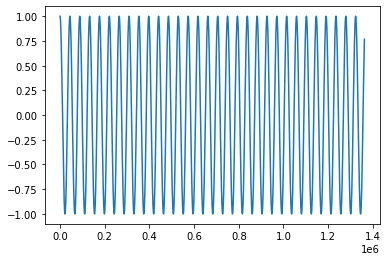

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


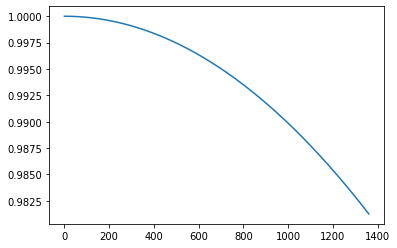

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:91: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [ ]:
#IDFT
from scipy.io.wavfile import read
from scipy import *
from pylab import *
import wave
import shutil
from pathlib import Path
import numpy as np
import scipy.signal as signal
import struct
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

%matplotlib inline

# 讀取 WAV 檔案
filename = 'Hello.wav'
rate = wave.open(filename, 'rb') #read 
print("Sample rate: {} Hz".format(rate))

nchannels = rate.getnchannels()
sample_width = rate.getsampwidth()
framerate = rate.getframerate()
numframes = rate.getnframes()
Readframes = rate.readframes(1)

print("channels: ", nchannels)
print("sample_width: ",sample_width )
print("framerate: ", framerate)
print("numframes: ", numframes)
print("readframes: ", Readframes)

def generate_sinusoid(N, A, f0, fs, phi):
    '''
    N(int) : number of samples
    A(float) : amplitude
    f0(float): frequency in Hz
    fs(float): sample rate
    phi(float): initial phase
    
    return 
    x (numpy array): sinusoid signal which lenght is M
    '''
    
    T = 1/fs
    n = np.arange(N)    # [0,1,..., N-1]
    x = A * np.cos( 2*f0*np.pi*n*T + phi )
    
    return x

N = numframes
A = nchannels
f0 = sample_width
fs = framerate
phi = 0
x = generate_sinusoid(N, A, f0, fs, phi)
X = fft(x, N)

plt.plot(x)
plt.show()

def generate_complex_sinusoid(n, N):
    '''
    n : time index (or frequency index)
    N : number of sample
    '''
    
    k = np.arange(N)
    
    c_sin = np.exp(1j*2*np.pi*k*n/N)
    
    return c_sin

# ifft loop
ifft_x = np.array([])

for i in range(136):
    s = generate_complex_sinusoid(i, N)
    ifft_x = np.append(ifft_x, 1/N * np.sum(X*s))

plt.figure()
plt.plot(ifft_x)
plt.show()

outfile = 'IDFT.wav'
outwave = wave.open(outfile, 'wb')#定義儲存路徑以及檔名
nchannels = 1
sampwidth = 1
fs = 44100
data_size = 1362220
framerate = int(fs)
nframes = data_size
comptype = "NONE"
compname = "not compressed"
outwave.setparams((nchannels, sampwidth, framerate, nframes,
comptype, compname))

for v in outData:
  outwave.writeframes(struct.pack('h', int(v * 64000 / 2)))#outData:16位，-32767~32767，注意不要溢位
outwave.close()

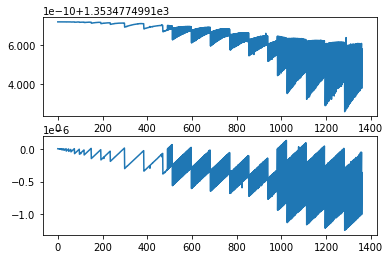

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [ ]:
#DFT逆轉----------------------------------------------------------------------

def generate_complex_sinusoid_Bor(k, N):
    '''
    k (int): frequency index
    N (int): length of complex sinusoid in samples
    
    returns
    c_sin (numpy array): the generated complex sinusoid (length N)
    '''
    
    n = np.arange(N)
    
    c_sin = np.exp(N / 1j * 2 * np.pi * k * n)
    
    return np.conjugate(c_sin)

def generate_complex_sinusoid_matrix_Bor(N):
    '''
    N (int): length of complex sinusoid in samples
    
    returns
    c_sin_matrix (numpy array): the generated complex sinusoid (length N)
    '''
    
    n = np.arange(N)
    n = np.expand_dims(n, axis=1)      # 扩充维度，将1D向量，转为2D矩阵，方便后面的矩阵相乘
    
    k = n
    
    m =N / n.T * k                      # [N,1] * [1, N] = [N,N]
    
    S = np.exp(1j * 2 * np.pi * m)     # 计算矩阵 S
    
    return np.conjugate(S)

# 生成信号，用于测试
N = 1362
A = 1
f0 = 1
fs = 44100
phi = 0
x = generate_sinusoid(N, A, f0, fs, phi)


# 第一种方式计算DFT
X_1 = np.array([])
for k in range(N):
    s = generate_complex_sinusoid_Bor(k, N)
    X_1 = np.append(X_1, np.sum(x * s))
    
mX = np.abs(X_1)
pX = np.angle(X_1)

# plot the magnitude and phase
plt.subplot(2,1,1)
plt.plot(mX)

plt.subplot(2,1,2)
plt.plot(pX)
plt.show()


r = 'Hello.wav'
f = wave.open(r, 'rb') #read
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
strData = f.readframes(nframes)#讀取音訊，字串格式
waveData = np.fromstring(strData,dtype=np.int16)#將字串轉化為int
waveData = waveData*1.0/(max(abs(waveData)))#wave幅值歸一化
f.close()
#wav檔案寫入
outData = waveData#待寫入wav的資料，這裡仍然取waveData資料
outfile = 'DFT.wav'
outwave = wave.open(outfile, 'wb')#定義儲存路徑以及檔名
nchannels = 1
sampwidth = 1
fs = 44100
data_size = len(outData)
framerate = int(fs)
nframes = data_size
comptype = "NONE"
compname = "not compressed"
outwave.setparams((nchannels, sampwidth, framerate, nframes,
comptype, compname))
for v in outData:
  outwave.writeframes(struct.pack('h', int(v * 64000 / 2)))#outData:16位，-32767~32767，注意不要溢位
outwave.close()

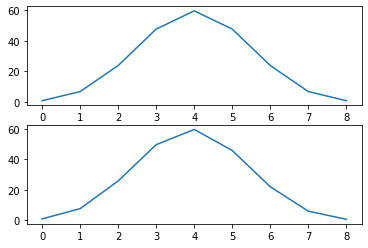

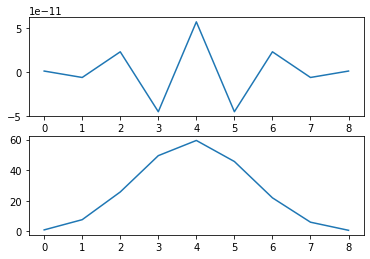

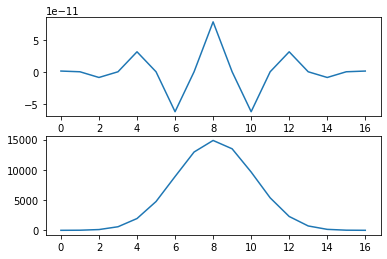

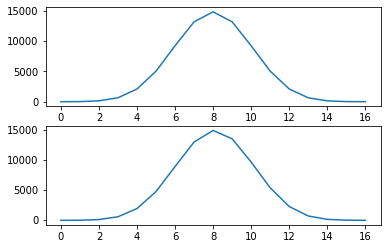

In [ ]:
#Filtering濾波器
from scipy import signal

# 生成信号，用于测试
N = 1362220
A = 1
f0 = 1
fs = 44100
phi = 0
x = generate_sinusoid(N, A, f0, fs, phi)

Fil = 'Hello.wav'
Fil_R = wave.open(r, 'rb') #read

b, a = signal.butter(8, 0.98, 'lowpass')   #配置濾波器 8 表示濾波器的階數
filtedData = signal.filtfilt(b, a, x)  #data為要過濾的訊號
# plot the magnitude and phase
plt.subplot(2,1,1)
plt.plot(b)

plt.subplot(2,1,2)
plt.plot(a)
plt.show()


b, a = signal.butter(8, 0.98, 'highpass')   #配置濾波器 8 表示濾波器的階數
filtedData = signal.filtfilt(b, a, x)  #data為要過濾的訊號

plt.subplot(2,1,1)
plt.plot(b)

plt.subplot(2,1,2)
plt.plot(a)
plt.show()

b, a = signal.butter(8, [0.98,0.96], 'bandpass')   #配置濾波器 8 表示濾波器的階數 帶通濾波
filtedData = signal.filtfilt(b, a, x)  #data為要過濾的訊號

plt.subplot(2,1,1)
plt.plot(b)

plt.subplot(2,1,2)
plt.plot(a)
plt.show()

b, a = signal.butter(8, [0.98,0.96], 'bandstop')   #配置濾波器 8 表示濾波器的階數 帶阻濾波
filtedData = signal.filtfilt(b, a, x)  #data為要過濾的訊號

plt.subplot(2,1,1)
plt.plot(b)

plt.subplot(2,1,2)
plt.plot(a)
plt.show()



# 新增區段

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


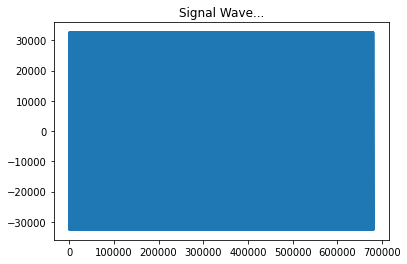

In [ ]:
#Filtering a wav file using python

import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

spf = wave.open('Hello.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(signal)

freq = 0.98
data_size = 1362220
fname ="Filter.wav"
frate = 44100  
amp = 44100  

sine_list_x = []
for x in range(data_size):
    sine_list_x.append(np.sin(2*np.pi*freq*(x/frate)))

wav_file = wave.open(fname,"w")

nchannels = 1
sampwidth = 1
framerate = int(frate)
nframes = data_size
comptype ="NONE"
compname ="not compressed"

wav_file.setparams((nchannels, sampwidth, framerate, nframes,
comptype, compname))

for s in sine_list_x:
    wav_file.writeframes(struct.pack('h', int(s*amp/2)))

wav_file.close()

# 新增區段

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


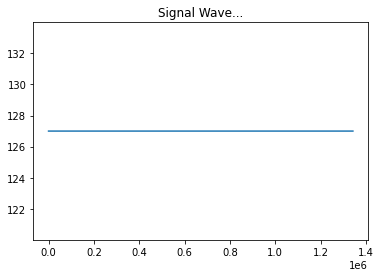

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import math
import contextlib

fname = 'Hello.wav'
outname = 'Filter.wav'

cutOffFrequency = 0.98

# from http://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def running_mean(x, windowSize):
  cumsum = np.cumsum(np.insert(x, 0, 0))
  return (cumsum[windowSize:] - cumsum[:-windowSize]) / windowSize

# from http://stackoverflow.com/questions/2226853/interpreting-wav-data/2227174#2227174
def interpret_wav(raw_bytes, n_frames, n_channels, sample_width, interleaved = True):

    if sample_width == 1:
        dtype = np.uint8 # unsigned char
    elif sample_width == 2:
        dtype = np.int16 # signed 2-byte short
    else:
        raise ValueError("Only supports 8 and 16 bit audio formats.")

    channels = np.fromstring(raw_bytes, dtype=dtype)

    if interleaved:
        # channels are interleaved, i.e. sample N of channel M follows sample N of channel M-1 in raw data
        channels.shape = (n_frames, n_channels)
        channels = channels.T
    else:
        # channels are not interleaved. All samples from channel M occur before all samples from channel M-1
        channels.shape = (n_channels, n_frames)

    return channels

with contextlib.closing(wave.open(fname,'rb')) as spf:
    sampleRate = spf.getframerate()
    ampWidth = spf.getsampwidth()
    nChannels = spf.getnchannels()
    nFrames = spf.getnframes()

    # Extract Raw Audio from multi-channel Wav File
    signal = spf.readframes(nFrames*nChannels)
    spf.close()
    channels = interpret_wav(signal, nFrames, nChannels, ampWidth, True)

    

    # get window size
    # from http://dsp.stackexchange.com/questions/9966/what-is-the-cut-off-frequency-of-a-moving-average-filter
    freqRatio = (cutOffFrequency/sampleRate)
    N = int(math.sqrt(0.196196 + freqRatio**2)/freqRatio)


    # Use moviung average (only on first channel)
    filtered = running_mean(channels[0], N).astype(channels.dtype)

    plt.figure(1)
    plt.title('Signal Wave...')
    plt.plot(filtered)

    wav_file = wave.open(outname,"w")
    wav_file.setparams((1, ampWidth, sampleRate, nFrames, spf.getcomptype(), spf.getcompname()))
    wav_file.writeframes(filtered.tobytes('C'))
    wav_file.close()